# Fundamentals of Data Analysis Weekly Tasks

### **Neil Anglim**
***

## imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1

### Collatz
> The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . . 


> For example, starting with the value 10, which is an even number, we divide it by 2 to get 5. Then 5 is an odd number so, we multiply by 3 and add 1 to get 16. Then we repeatedly divide by 2 to get 8, 4, 2, 1. Once we are at 1, we go back to 4 and get stuck in the repeating sequence 4, 2, 1 as we suspected. Your task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

#### The below code is copied from Ian's Tutorial and will be used for inspiration in the following code

In [2]:
#defining the function
def f(x):
    if (x % 2 == 0):#if the number is even
        return x // 2
    elif (x % 2 == 1):
        return (x * 3) + 1   #if the number is odd
    else:
        print ("Something went wrong in collatz")
        return None

In [3]:
def collatz(x):
    print(f'Testing Collatz with the inital value {x}')
    while x != 1:
        print(x, end=', ')
        x = f(x)
    print(x)


In [4]:
collatz(10000)

Testing Collatz with the inital value 10000
10000, 5000, 2500, 1250, 625, 1876, 938, 469, 1408, 704, 352, 176, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1


#### Below I use a slightly different method for the task execution

In [5]:
def collatz_sequence(n): #define a function to generate collatz for a given number n
    sequence = [n] #initialise a list with starting number n
    while n != 1:
        if n % 2 == 0: #check if in is even
            n = n // 2 #divide by 2
        else:
            n = (3 * n) + 1 #if it is odd, multiply by 3 and add 1
        sequence.append(n) # Append the new value of n to the sequence
    return sequence

In [6]:
def verify_collatz(limit): #define a function to verify collatz up to a limit
    for i in range(1, limit + 1): #cleverly remember that the limit will need to include this +1, thanks to zero indexing
        sequence = collatz_sequence(i) #calling in the previous function
        if sequence[-1] != 1: #if the last element of the sequence is not 1, then the conjecture is proven false
            return False
    return True

result = verify_collatz(10000) #call the function to verify for the limit of 10,0000
if result:
    print("Collatz conjecture is true for the first 10,000 positive integers.")
else:
    print("Collatz conjecture does not work for the first 10,000 positive integers")

Collatz conjecture is true for the first 10,000 positive integers.


## Task 2

### Penguins

> Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.

> <https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv>

This dataset contains information about different species of penguin, and compares their different characteristics using a medium sample size. The main variables used in the dataset are as follows:
1. **Species**: The first column of the dataset represents the species of the penguin; there is three different species included here; Adélie, Chinstrap and Gentoo.
2. **Island** : This denotes the island on which the penguin was observed, there are three options: "Biscoe", "Dream" and "Torgersen". A quick search informs me that these islands are located in the Palmer Archipelago, and that Biscoe are a group of islands, while Dream and Torgersen are individual land masses.
3. **Bill length (mm)**: This is the length of the *top* of the penguins bill in millimeters. According to the commits on the dataset on GitHub, this was changed from "culmen" to "bill", probably for clarity.
4. **Bill depth (mm)**: Represents the depth of the penguins bill, also measured in millimeters.
5. **Flipper length(mm)**: The variable containing the length of the penguins flipper, measured in millimeters.
6. **Body mass**: Indicates the body mass of the animals in grams.
7. **Sex**: Denotes the gender of the penguin. Multiple missing entries throughout the dataset.

> I learned more about levels of measurement from the scribbr site -> "https://www.scribbr.com/statistics/levels-of-measurement/" and also from the original "On the Theory of Scales of Measurement" "https://www.jstor.org/stable/1671815" [Accessed 13 Oct 2023]

Interval variables would be useful to explore the dataset, although none of the variables strictly qualify as interval variables, due to their lack of equal intervals. However, the differences between measurements in the cases of **Bill length**, **Bill depth**, **Flipper length**, and **Body mass** are meaningful, and they lack a true zero point.

Nominal variables, representing categories without any inherent order, would be useful in the case of **Species** and **Island**.

## Task 3

### Penguins Probabability Distribution

> For each of the variables in the penguin data set, suggest what probability distribution from the numpy random distribution list is the most appropriate to model the variable.

> https://numpy.org/doc/stable/reference/random/generator.html#distributions

The variables are as listed below;

In [7]:
peng = sns.load_dataset('penguins')
for col in peng.columns:
    print(col)

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex


#### Categorical Variables

First, **species** is quite simple, as there is little variation, there being only 3 different values throughout the dataset, other than the quantities which may not be evenly spread across species.

In [8]:
species_counts = peng['species'].value_counts()
print(species_counts)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


<Axes: xlabel='species'>

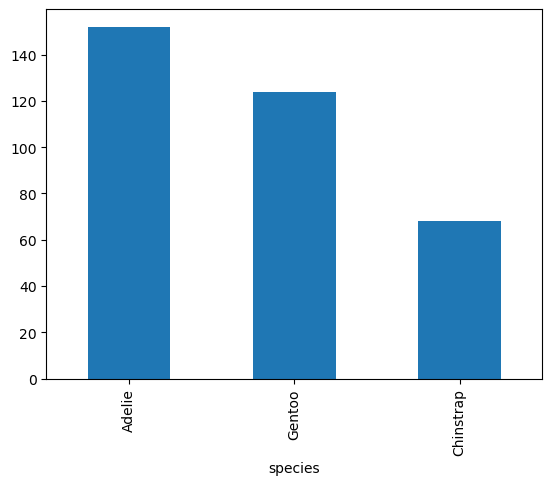

In [9]:
species_counts.plot(kind='bar')

In the case of the species variable, it would be useful/most relevent to use a [Poisson distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson), as it is often used in an fixed interval of time, where events are random and independant of each other, and it has a similar distribution shape. 

**Island** is similar to this in that it is a categorical variable..

In [10]:
island_counts = peng['island'].value_counts()
print(island_counts)

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


<Axes: xlabel='island'>

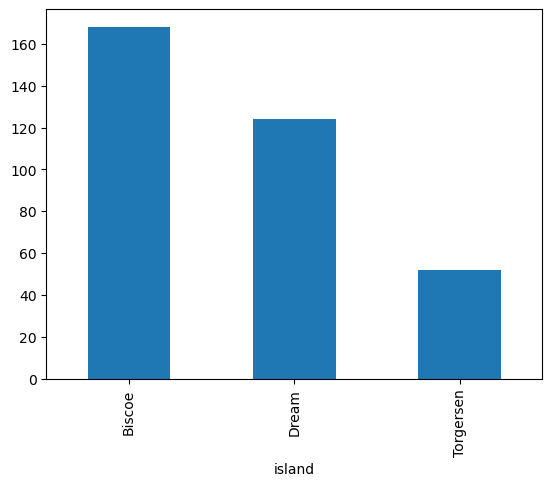

In [11]:
island_counts.plot(kind='bar')

**Sex**
The sex variable is made up of almost a 50/50 distribution between male and female

In [12]:
sex_counts = peng['sex'].value_counts()
print(sex_counts)

sex
Male      168
Female    165
Name: count, dtype: int64


<Axes: xlabel='sex'>

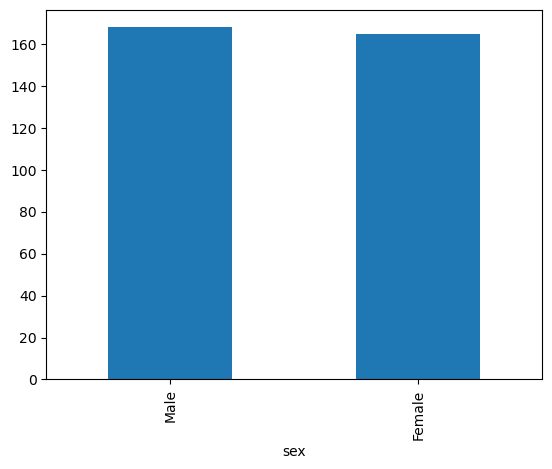

In [13]:
sex_counts.plot(kind='bar')

In the case of all of these categorical variables, I think it would be better to use descriptive statistics, a variety of charts such as bar plots or pie charts to visualise the data, and tests designed for the analysis of categorical data such as a chi-square test (to test for independence or association with other variables) rather than random probability distributions.

#### Numerical Variables

By devising the below function, which takes the dataset and variables as argument, we have greatly simplified the process of visualizing different variables' distributions within each penguin species and across sexes, allowing for easy comparison and analysis of the data. 

In [14]:
def plot_variable_distribution(peng, variable):
    unique_species = peng['species'].unique()

    for species in unique_species:
        species_data = peng[peng['species'] == species]
        
        # Create a new figure for each species
        plt.figure(figsize=(5, 5))
        
        # Separate data for Male and Female based on the variable
        male_data = species_data[species_data['sex'] == 'Male'][variable]
        female_data = species_data[species_data['sex'] == 'Female'][variable]
        
        # Plot histograms for Male and Female
        plt.hist(male_data, alpha=0.3, label='Male', color='green')
        plt.hist(female_data, alpha=0.5, label='Female', color='red')
        
        plt.title(f"{species} Penguin - {variable.replace('_', ' ')} distribution by Sex")
        plt.xlabel(f"{variable.replace('_', ' ').title()}")
        plt.ylabel("Frequency")
            
        plt.legend()
        # Show the plot for each species
        plt.show()

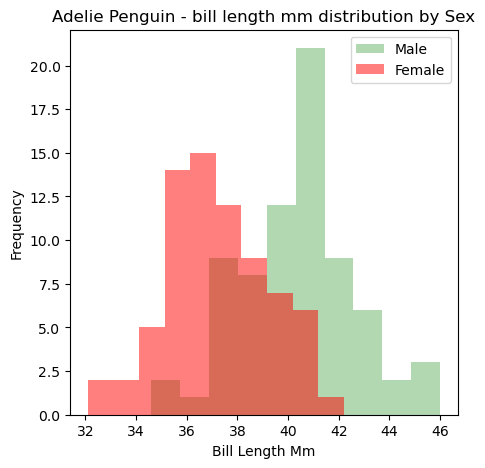

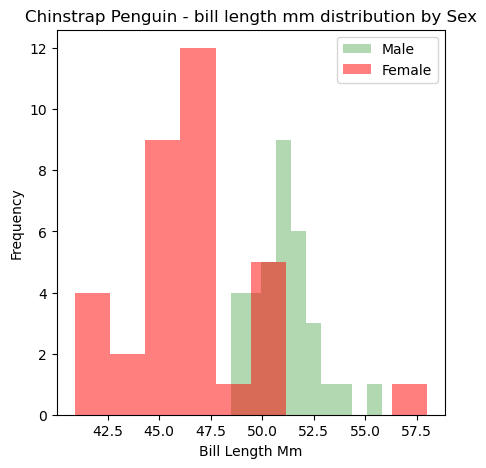

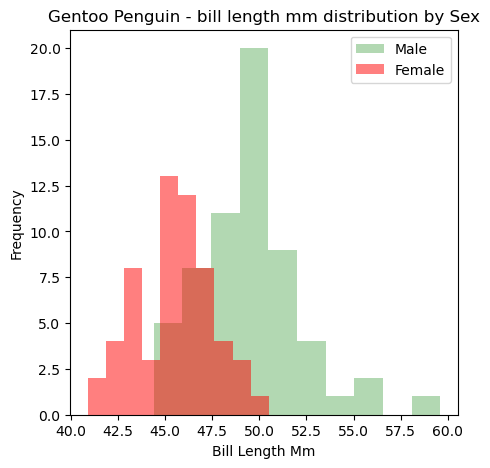

In [15]:
plot_variable_distribution(peng, 'bill_length_mm')

From the above bill length visualisations, we can see that the distributions are all close to normal, with a number of outliers. It can also be noted that, on average, males are larger than females.

bill_depth_mm

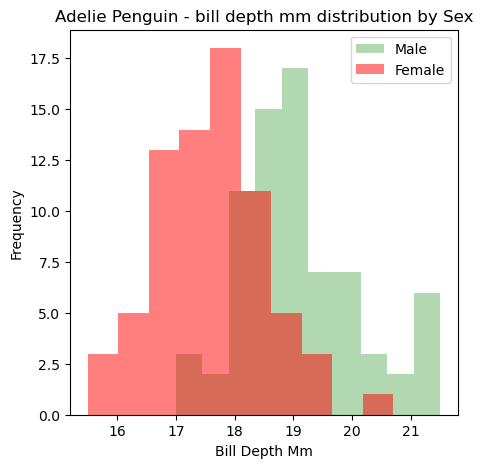

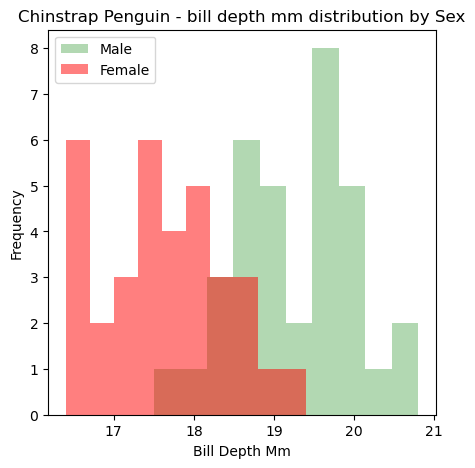

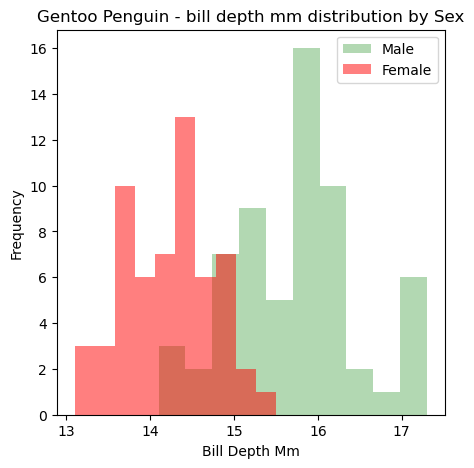

In [16]:
plot_variable_distribution(peng, 'bill_depth_mm')

flipper_length_mm

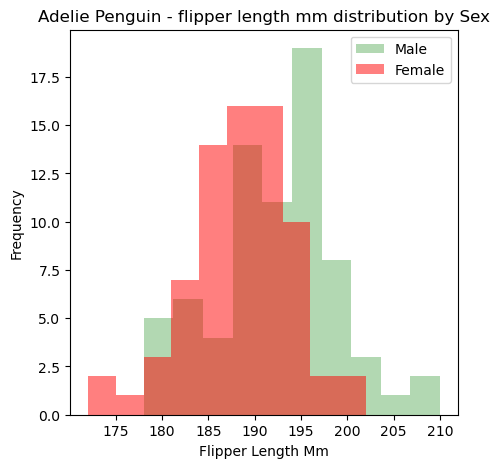

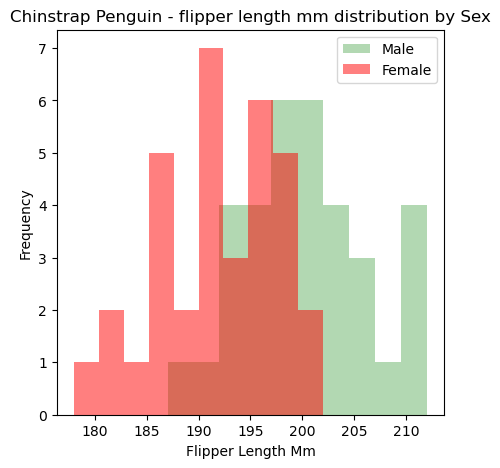

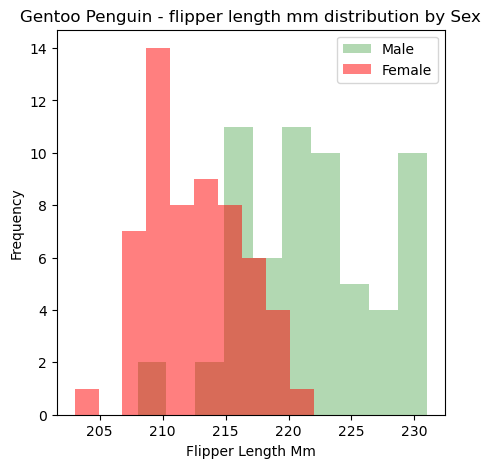

In [17]:
plot_variable_distribution(peng, 'flipper_length_mm')

body_mass_g

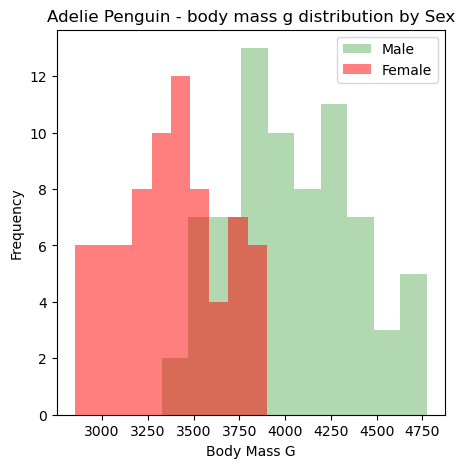

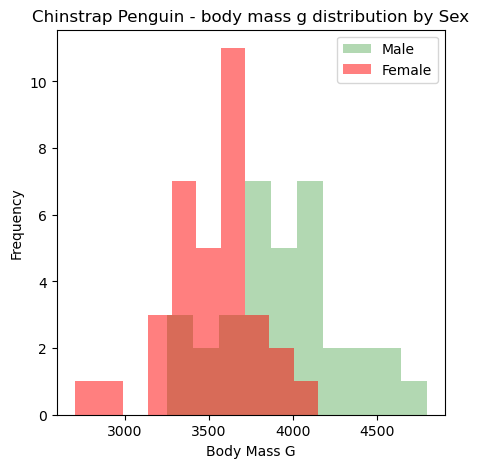

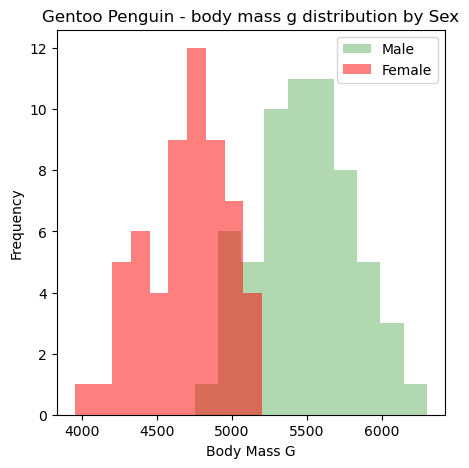

In [18]:
plot_variable_distribution(peng, 'body_mass_g')

From the above graphs, it is evident that these variables follow a normal distribution when they are subdivided into separate sex and species. A normal distribution would suffice for all of them, using upper and lower limitations , and possibly implementing a low level of random noise.

## Task 4

### Coin Flip

> Suppose you are flipping two coins,each with a probability ***p*** of giving heads. Plot the entropy of the total number of heads versus ***p***.

$ H(X) := - \sum_{x \in X} p(x) \log p(x) $

Here is a function to calculate entropy: using the negative sum of the product of the probability and the log of the probability

In [19]:
def entropy(p):
    return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

testing my entropy function

In [20]:
entropy(0.5)

1.0

Probabilities ranging from 0 to 1
 
 avoiding 0 and 1 for log calculation

In [21]:
P_values = np.linspace(0.01,0.99,100)

the linspace function from np can be used to return evenly spaced numbers over a specified interval (from numpy documentation "https://numpy.org/doc/stable/reference/generated/numpy.linspace.html")

Now to calculate entropy for each probability value

In [22]:
entropy_values = [] # start an empty list
for P in P_values:
    entropy_values.append(entropy(P))

Plot the entropy against probability P 

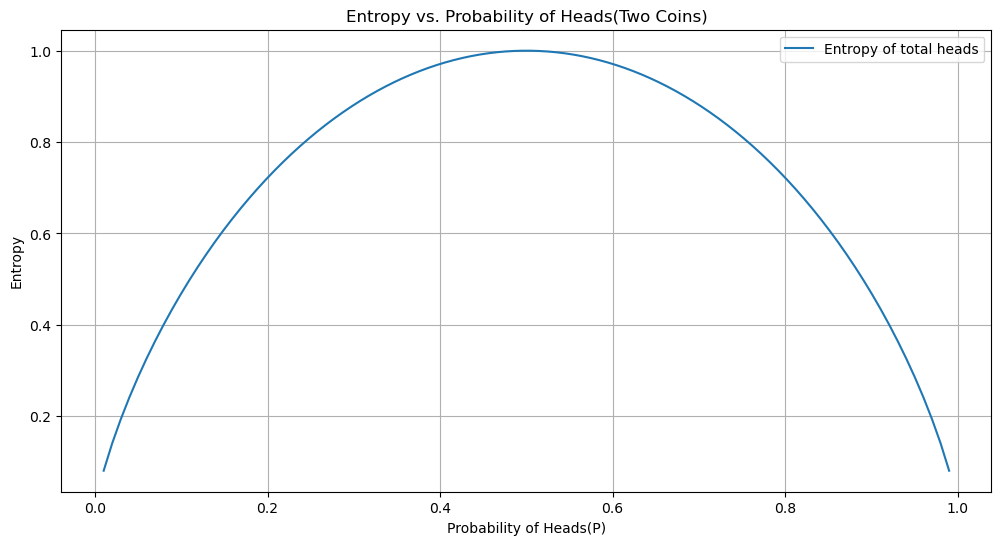

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(P_values, entropy_values, label='Entropy of total heads')
plt.title('Entropy vs. Probability of Heads(Two Coins)')
plt.xlabel('Probability of Heads(P)')
plt.ylabel('Entropy')
plt.legend()
plt.grid(True)

This graph demonstrates how the entropy of the total number of heads changes as the probability of getting heads in a single coin flip changes, highlighting the relationship between **probability** and **uncertainty** in the context of flipping two coins.

As **P** moves away from 0.5 and approaches 0 or 1, the entropy decreases, signifying a decrease in randomness or disorder. When P is close to 0 or 1, the **entropy** reaches its minimum since the outcome becomes more predictable.

## Task 5

### Plots for penguins

> Create an appropriate individual plot for each of the variables in the penguin data set.

Start by loading in the dataset, under a different name to task 3.

In [24]:
penguins = sns.load_dataset('penguins')

Checking that it is loading from the dataset with first 3 and last 3 from the dataset

In [25]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [26]:
penguins.tail(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


I want to look at the distribution of body mass, but I know there are a couple of missing entries. To remedy this, I referred to
[stackoverflow](https://stackoverflow.com/questions/32902832/what-to-do-with-missing-values-when-plotting-with-seaborn)
and found the dropna() method, to avoid possible problems down the line.

In [27]:
penguins = penguins.dropna(subset=['body_mass_g'])

Text(0, 0.5, 'Frequency')

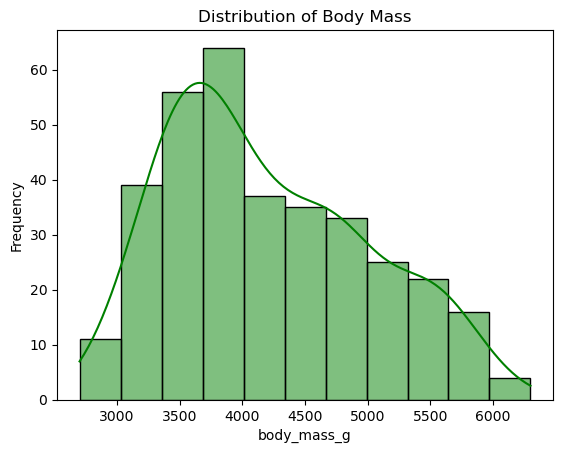

In [28]:
sns.histplot(x=penguins.body_mass_g,kde=True, color="green") 
plt.title("Distribution of Body Mass")
plt.ylabel("Frequency")

Now I want to have a look at comparing the body mass of the penguins. I will use a boxplot and compare species and sex and the distribution across these.

<Axes: xlabel='body_mass_g', ylabel='species'>

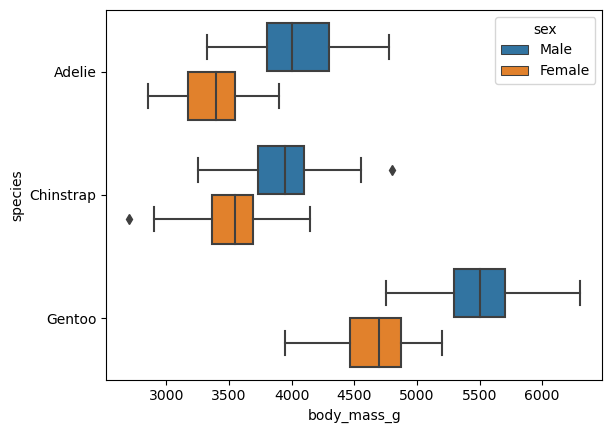

In [29]:
sns.boxplot(x=penguins.body_mass_g, y=penguins.species, hue=penguins.sex) 

From the above box plot, it is evident that the Gentoo penguins are much heavier, and that male penguins are heavier in all species.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

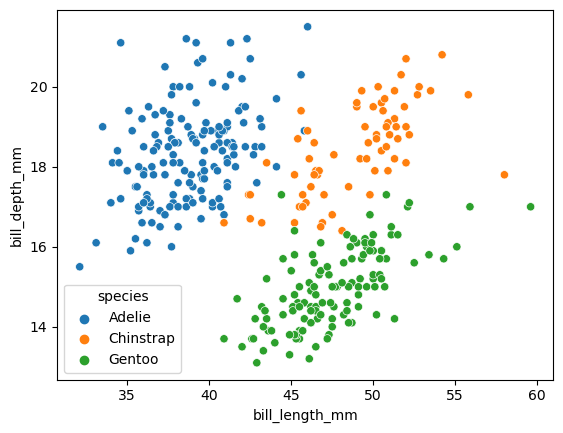

In [30]:
#sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue=)
sns.scatterplot(x=penguins.bill_length_mm, y=penguins.bill_depth_mm, hue=penguins.species)

*** 
# End